In [3]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [5]:
series = read_csv('sales-of-shampoo.csv',delimiter=";" ,header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


1-01
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
Name: 266.0, dtype: float64


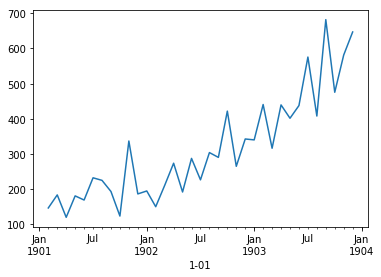

In [6]:
print(series.head())
series.plot()
pyplot.show()

In [7]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Zakir\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Zakir\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.266.0   No. Observations:                   34
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -188.279
Method:                       css-mle   S.D. of innovations             59.834
Date:                Tue, 05 Jun 2018   AIC                            390.559
Time:                        20:22:35   BIC                            401.243
Sample:                    03-01-1901   HQIC                           394.203
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.5140      3.340      4.046      0.000       6.968      20.060
ar.L1.D.266.0    -1.1471      0.171     -6.709      0.000      -1.482      -0.812
ar.L2.D.266.0    -0.6961      0.265     

In [9]:
X = series.values
X

array([145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8, 122.9,
       336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. , 226. ,
       303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9, 439.3,
       401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [10]:
size = int(len(X) * 0.66)

In [11]:
train, test = X[0:size], X[size:len(X)]


In [12]:
history = [x for x in train]

In [13]:
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=326.860810, expected=339.700000
predicted=391.723429, expected=440.400000
predicted=353.007412, expected=315.900000
predicted=385.696622, expected=439.300000
predicted=367.847652, expected=401.300000
predicted=448.604983, expected=437.400000
predicted=401.917986, expected=575.500000
predicted=429.887247, expected=407.600000
predicted=514.777979, expected=682.000000
predicted=442.026693, expected=475.300000
predicted=651.955318, expected=581.300000
predicted=561.306352, expected=646.900000
Test MSE: 6670.446


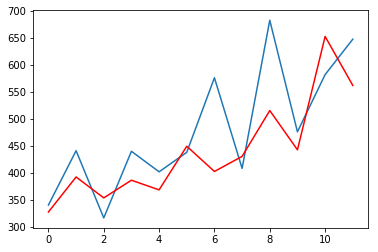

In [14]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()